In [1]:
import pandas as pd
import numpy as np
# What are the most commonly reported foodstuffs?
# What are the most commonly reported medical reactions to foods?
# Where do people in the US most commonly report food-related conditions?

In [2]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/laura/Georgetown/data-analytics-bootcamp-9dd2527a6606.json"

In [5]:
# Download the data from GCS
df = pd.read_csv("gs://georgetown-data-analytics-bootcamp-fall2020/CAERS_ASCII_11_18_to_3_20.csv", encoding="latin-1")

In [6]:
# Check out the data
df.head()

,Report ID,CAERS Created Date,Date of Event,Product Type,Product,Product Code,Description,Patient Age,Age Units,Sex,Medra Preferred Terms,Outcomes
0,2018-CFS-000002,1/2/2018,5/14/2017,SUSPECT,CORAL CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"BLOOD CALCIUM INCREASED, RENAL DISORDER","Hospitalization, Patient Visited ER,"
1,2018-CFS-000007,1/2/2018,NaN,SUSPECT,CELLUCOR ALPHA AMINO,54,Vit/Min/Prot/Unconv Diet(Human/Animal),15.0,year(s),M,"DYSPNOEA, OCULAR HYPERAEMIA, OCULAR HYPERAEMIA...","Other Seriousness, Patient Visited ER,"
2,2018-CFS-000008,1/2/2018,NaN,SUSPECT,Eco Style Professional Styling Gel Black Cast...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome
3,2018-CFS-000009,1/2/2018,NaN,SUSPECT,ECO STYLE PROFESSIONAL STYLING GEL BLACK CASTO...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome
4,2018-CFS-000010,1/2/2018,NaN,SUSPECT,SOY MASKING AGENTS,45,Food Additives (Human Use),36.0,year(s),F,"EYE IRRITATION, THROAT IRRITATION","Disability,"


In [7]:
# Get a look at the columns
df.columns

Index(['Report ID', 'CAERS Created Date', 'Date of Event', 'Product Type',
       'Product', 'Product Code', 'Description', 'Patient Age', 'Age Units',
       'Sex', 'Medra Preferred Terms', 'Outcomes'],
      dtype='object')

In [10]:
df.describe(include='all')

,Report ID,CAERS Created Date,Date of Event,Product Type,Product,Product Code,Description,Patient Age,Age Units,Sex,Medra Preferred Terms,Outcomes
count,30766,30766,23790,30766,30763,30143,30143,21803.000000,21899,21681,30063,30766
unique,20214,743,2827,2,12553,47,43,NaN,5,2,8379,127
top,2019-CFS-004017,2/21/2020,1/1/2018,SUSPECT,EXEMPTION 4,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,year(s),F,OVARIAN CANCER,"Medically Important,"
freq,28,291,400,23823,8416,14528,14528,NaN,21646,16676,3452,10296
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.376095,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.837458,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN


In [8]:
df.shape

(30766, 12)

In [9]:
# look for missing values using isna() (which creates a boolean mask) 
# and sum() (which interpretes True as 1)
df.isna().sum()

Report ID                   0
CAERS Created Date          0
Date of Event            6976
Product Type                0
Product                     3
Product Code              623
Description               623
Patient Age              8963
Age Units                8867
Sex                      9085
Medra Preferred Terms     703
Outcomes                    0
dtype: int64

In [5]:
# Investigate some of the values in the less defined fields from the README
# Use .unique() on the Series to get a quick look at the possible values
df['Age Units'].unique()

array([nan, 'year(s)', 'month(s)', 'Decade(s)', 'day(s)', 'week(s)'],
      dtype=object)

In [7]:
df['Product'].unique()

array(['CORAL CALCIUM', 'CELLUCOR ALPHA AMINO',
       'Eco Style Professional Styling Gel  Black Castor and Flax Seed Oil',
       ..., 'CAFFIENE BASED DRINKS', 'KIDSCENTS MIGHTY PRO', 'L SERINE'],
      dtype=object)

In [8]:
df['Description'].unique()

array([' Vit/Min/Prot/Unconv Diet(Human/Animal)', ' Cosmetics',
       ' Food Additives (Human Use)', ' Vegetables/Vegetable Products',
       ' Macaroni/Noodle Prod', ' Medical Foods, N.E.C.',
       ' Soft Drink/Water', ' Whole Grain/Milled Grain Prod/Starch',
       ' Mult Food Dinner/Grav/Sauce/Special', ' Fruit/Fruit Prod',
       ' Candy W/O Choc/Special/Chew Gum', ' Snack Food Item',
       ' Choc/Cocoa Prod', ' Soup', nan, ' Milk/Butter/Dried Milk Prod',
       ' Fishery/Seafood Prod', ' Meat, Meat Products and Poultry',
       ' Cereal Prep/Breakfast Food', ' Ice Cream Prod',
       ' Nuts/Edible Seed',
       ' Dietary Conventional Foods/Meal Replacements', ' Coffee/Tea',
       ' Prep Salad Prod', ' Filled Milk/Imit Milk Prod',
       ' Alcoholic Beverage', ' Bakery Prod/Dough/Mix/Icing',
       ' Dressing/Condiment', ' Vegetable Oils',
       ' Ready to Serve Formula',
       ' Gelatin/Rennet/Pudding Mix/Pie Filling', ' Egg/Egg Prod',
       ' Beverage Bases/Conc/Nectar', '

In [114]:
# check what dtypes came in and if we agree with them
df.dtypes

Report ID                 object
CAERS Created Date        object
Date of Event             object
Product Type              object
Product                   object
Product Code              object
Description               object
Patient Age              float64
Age Units                 object
Sex                       object
Medra Preferred Terms     object
Outcomes                  object
dtype: object

In [11]:
# change the dtypes of the dates so we can do timeseries
# using the to_datetime function on the series, we can cast a parseable to date to datetime
# we can add that as a new column with assignment
df['Date of Event Converted'] = pd.to_datetime(df['Date of Event'])
df['CAERS Created Date Converted'] = pd.to_datetime(df['CAERS Created Date'])

In [12]:
df.dtypes

Report ID                               object
CAERS Created Date                      object
Date of Event                           object
Product Type                            object
Product                                 object
Product Code                            object
Description                             object
Patient Age                            float64
Age Units                               object
Sex                                     object
Medra Preferred Terms                   object
Outcomes                                object
Date of Event Converted         datetime64[ns]
CAERS Created Date Converted    datetime64[ns]
dtype: object

In [13]:
# check out the new columns on the right
df.head()

,Report ID,CAERS Created Date,Date of Event,Product Type,Product,Product Code,Description,Patient Age,Age Units,Sex,Medra Preferred Terms,Outcomes,Date of Event Converted,CAERS Created Date Converted
0,2018-CFS-000002,1/2/2018,5/14/2017,SUSPECT,CORAL CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"BLOOD CALCIUM INCREASED, RENAL DISORDER","Hospitalization, Patient Visited ER,",2017-05-14,2018-01-02
1,2018-CFS-000007,1/2/2018,NaN,SUSPECT,CELLUCOR ALPHA AMINO,54,Vit/Min/Prot/Unconv Diet(Human/Animal),15.0,year(s),M,"DYSPNOEA, OCULAR HYPERAEMIA, OCULAR HYPERAEMIA...","Other Seriousness, Patient Visited ER,",NaT,2018-01-02
2,2018-CFS-000008,1/2/2018,NaN,SUSPECT,Eco Style Professional Styling Gel Black Cast...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome,NaT,2018-01-02
3,2018-CFS-000009,1/2/2018,NaN,SUSPECT,ECO STYLE PROFESSIONAL STYLING GEL BLACK CASTO...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome,NaT,2018-01-02
4,2018-CFS-000010,1/2/2018,NaN,SUSPECT,SOY MASKING AGENTS,45,Food Additives (Human Use),36.0,year(s),F,"EYE IRRITATION, THROAT IRRITATION","Disability,",NaT,2018-01-02


Use wrangling functions and apply them row-wise or cell-wise to create new columns.

In [14]:
def convert_age(row):
    age = row['Patient Age']
    if pd.isnull(age):
        return None
    units = row['Age Units']
    if pd.isnull(units):
        return None
    
    lookup = {'year(s)': 1.0,
             'month(s)': 12.0,
             'week(s)': 52.0,
             'day(s)': 365.0,
             'Decade(s)': .1}
    return age/lookup[units]

    


In [ ]:
df['Normalized Age'] = df.apply(lambda row: convert_age(row), axis=1)

In [25]:
df[(df['Age Units'] != 'year(s)') &(df['Age Units'].notnull())]\
    [['Patient Age','Age Units','Normalized Age']]\
    .tail(10)

,Patient Age,Age Units,Normalized Age
29285,52.0,day(s),0.142466
29286,37.0,day(s),0.101370
29309,3.0,month(s),0.250000
29640,6.0,Decade(s),60.000000
29800,8.0,Decade(s),80.000000
29876,8.0,month(s),0.666667
30152,6.0,Decade(s),60.000000
30444,8.0,Decade(s),80.000000
30514,18.0,month(s),1.500000
30579,4.0,Decade(s),40.000000


In [26]:
def agebins(age):
    
    if age < 2:
        return 'baby'
    
    if age >=2 and age < 13:
        return 'child'
    
    if age >= 13 and age < 18:
        return 'teenager'
    
    if age >= 18 and age < 25:
        return 'youngAdult'
    
    if age >=25 and age < 65:
        return 'adult'
    
    if age >= 65:
        return 'senior'

In [27]:
df['AgeBins'] = df['Normalized Age'].apply(lambda x: agebins(x))

In [31]:
df[df['AgeBins'].notnull()][['Normalized Age', 'AgeBins']]

,Normalized Age,AgeBins
1,15.0,teenager
4,36.0,adult
5,25.0,adult
6,60.0,adult
7,31.0,adult
...,...,...
30760,4.0,child
30761,70.0,senior
30762,52.0,adult
30763,65.0,senior


In [125]:
def normalize_product(product):
    if pd.isna(product):
        return None
    return product.lower().strip()

In [ ]:
df['Normalized Product'] = df['Product'].apply(lambda x: normalize_product(x))

-----

In [52]:
# we can do the same thing with a special kind of string methods in pandas
df_copy = df[['Report ID','Product', 'Outcomes']].copy()

In [53]:
df_copy.dtypes

Report ID    object
Product      object
Outcomes     object
dtype: object

In [54]:
df_copy['Product'] = df_copy['Product'].astype("string")
df_copy['Outcomes'] = df_copy['Outcomes'].astype("string")

In [55]:
df_copy.dtypes

Report ID    object
Product      string
Outcomes     string
dtype: object

In [56]:
df_copy['Product'].str.upper()

0                                            CORAL CALCIUM
1                                     CELLUCOR ALPHA AMINO
2        ECO STYLE PROFESSIONAL STYLING GEL  BLACK CAST...
3        ECO STYLE PROFESSIONAL STYLING GEL BLACK CASTO...
4                                       SOY MASKING AGENTS
                               ...                        
30761                             AGELESS MALE PERFORMANCE
30762                                               RMFLEX
30763                      SUPER BETA PROSTATE P3 ADVANCED
30764                                 AGELESS MALE TONIGHT
30765                                             L SERINE
Name: Product, Length: 30766, dtype: string

In [57]:
df_copy['Product'].str.lower()

0                                            coral calcium
1                                     cellucor alpha amino
2        eco style professional styling gel  black cast...
3        eco style professional styling gel black casto...
4                                       soy masking agents
                               ...                        
30761                             ageless male performance
30762                                               rmflex
30763                      super beta prostate p3 advanced
30764                                 ageless male tonight
30765                                             l serine
Name: Product, Length: 30766, dtype: string

In [58]:
df_copy['Product'].str.lower().str.contains(r"(multivitamin|multi vitamin)")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0        False
1        False
2        False
3        False
4        False
         ...  
30761    False
30762    False
30763    False
30764    False
30765    False
Name: Product, Length: 30766, dtype: boolean

In [60]:
df_copy['Outcomes'].str.split(',')

0          [Hospitalization,  Patient Visited ER,  ]
1        [Other Seriousness,  Patient Visited ER,  ]
2                                    [Other Outcome]
3                                    [Other Outcome]
4                                    [Disability,  ]
                            ...                     
30761                       [Medically Important,  ]
30762                       [Medically Important,  ]
30763                       [Medically Important,  ]
30764                       [Medically Important,  ]
30765                       [Medically Important,  ]
Name: Outcomes, Length: 30766, dtype: object

-----

In [46]:
df.head()

,Report ID,CAERS Created Date,Date of Event,Product Type,Product,Product Code,Description,Patient Age,Age Units,Sex,Medra Preferred Terms,Outcomes,Date of Event Converted,CAERS Created Date Converted,Normalized Age,AgeBins
0,2018-CFS-000002,1/2/2018,5/14/2017,SUSPECT,CORAL CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"BLOOD CALCIUM INCREASED, RENAL DISORDER","Hospitalization, Patient Visited ER,",2017-05-14,2018-01-02,NaN,None
1,2018-CFS-000007,1/2/2018,NaN,SUSPECT,CELLUCOR ALPHA AMINO,54,Vit/Min/Prot/Unconv Diet(Human/Animal),15.0,year(s),M,"DYSPNOEA, OCULAR HYPERAEMIA, OCULAR HYPERAEMIA...","Other Seriousness, Patient Visited ER,",NaT,2018-01-02,15.0,teenager
2,2018-CFS-000008,1/2/2018,NaN,SUSPECT,Eco Style Professional Styling Gel Black Cast...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome,NaT,2018-01-02,NaN,None
3,2018-CFS-000009,1/2/2018,NaN,SUSPECT,ECO STYLE PROFESSIONAL STYLING GEL BLACK CASTO...,53,Cosmetics,NaN,NaN,NaN,PRURITUS,Other Outcome,NaT,2018-01-02,NaN,None
4,2018-CFS-000010,1/2/2018,NaN,SUSPECT,SOY MASKING AGENTS,45,Food Additives (Human Use),36.0,year(s),F,"EYE IRRITATION, THROAT IRRITATION","Disability,",NaT,2018-01-02,36.0,adult


In [47]:
# Use pivot tables and plot them
count_by_agebin_sex_pivot = pd.pivot_table(df, columns=['Sex'], index=['AgeBins'], values=['Product'], aggfunc='count')

In [48]:
print(count_by_agebin_sex_pivot)

           Product      
Sex              F     M
AgeBins                 
adult        11024  2627
baby           116    85
child          262   231
senior        4311  1743
teenager       144    70
youngAdult     774   203


<AxesSubplot:xlabel='AgeBins'>

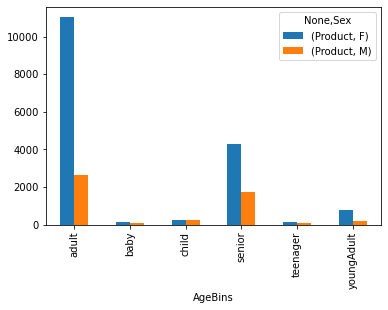

In [49]:
count_by_agebin_sex_pivot.plot(kind='bar')

<AxesSubplot:xlabel='CAERS Created Date Converted'>

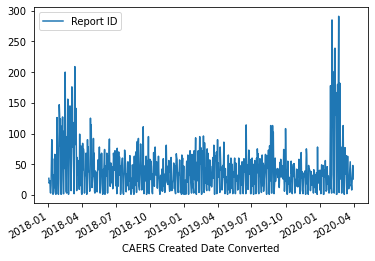

In [51]:
pd.pivot_table(df, index='CAERS Created Date Converted', values='Report ID', aggfunc='count').plot()

In [99]:
groups = df.groupby('Normalized Product')[['Normalized Product', 'Report ID']].count()

In [100]:
# use sort_values to order
groups.sort_values(by='Report ID', ascending=False).head(50)

,Normalized Product,Report ID
Normalized Product,,
exemption 4,8416,8416
vitamin d,394,394
multivitamin,244,244
super beta prostate p3 advanced,228,228
preservision areds 2,203,203
vitamin c,196,196
fish oil,196,196
kratom,193,193
calcium,170,170


-----

In [65]:
# merging data
lookup = [[' Vit/Min/Prot/Unconv Diet(Human/Animal)', 'food'], 
          [' Cosmetics', 'nonfood'], 
          [' Food Additives (Human Use)', 'food'], 
          [' Vegetables/Vegetable Products', 'food']]
#        ' Macaroni/Noodle Prod', ' Medical Foods, N.E.C.',
#        ' Soft Drink/Water', ' Whole Grain/Milled Grain Prod/Starch',
#        ' Mult Food Dinner/Grav/Sauce/Special', ' Fruit/Fruit Prod',
#        ' Candy W/O Choc/Special/Chew Gum', ' Snack Food Item',
#        ' Choc/Cocoa Prod', ' Soup', nan, ' Milk/Butter/Dried Milk Prod',
#        ' Fishery/Seafood Prod', ' Meat, Meat Products and Poultry',
#        ' Cereal Prep/Breakfast Food', ' Ice Cream Prod',
#        ' Nuts/Edible Seed',
#        ' Dietary Conventional Foods/Meal Replacements', ' Coffee/Tea',
#        ' Prep Salad Prod', ' Filled Milk/Imit Milk Prod',
#        ' Alcoholic Beverage', ' Bakery Prod/Dough/Mix/Icing',
#        ' Dressing/Condiment', ' Vegetable Oils',
#        ' Ready to Serve Formula',
#        ' Gelatin/Rennet/Pudding Mix/Pie Filling', ' Egg/Egg Prod',
#        ' Beverage Bases/Conc/Nectar', ' Cheese/Cheese Prod',
#        ' Baby Food Products', ' Spices, Flavors And Salts',
#        ' Powder Formula', ' Food Sweeteners (Nutritive)',
#        ' Formula, Form Unspecified', ' Vegetable Protein Prod',
#        ' Liquid Concentrate Formula', ' Formula Raw Material',
#        'Food Service/Conveyance', ' Miscellaneous Food Related Items']

lookup_df = pd.DataFrame(data=lookup, columns=['ProductDescription', 'FoodCategory'])

In [66]:
lookup_df.head()

,ProductDescription,FoodCategory
0,Vit/Min/Prot/Unconv Diet(Human/Animal),food
1,Cosmetics,nonfood
2,Food Additives (Human Use),food
3,Vegetables/Vegetable Products,food


In [76]:
merged_df = df.merge(lookup_df, left_on="Description", right_on="ProductDescription")

In [77]:
merged_df.head()

,Report ID,CAERS Created Date,Date of Event,Product Type,Product,Product Code,Description,Patient Age,Age Units,Sex,Medra Preferred Terms,Outcomes,Date of Event Converted,CAERS Created Date Converted,Normalized Age,AgeBins,ProductDescription,FoodCategory
0,2018-CFS-000002,1/2/2018,5/14/2017,SUSPECT,CORAL CALCIUM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"BLOOD CALCIUM INCREASED, RENAL DISORDER","Hospitalization, Patient Visited ER,",2017-05-14,2018-01-02,NaN,None,Vit/Min/Prot/Unconv Diet(Human/Animal),food
1,2018-CFS-000007,1/2/2018,NaN,SUSPECT,CELLUCOR ALPHA AMINO,54,Vit/Min/Prot/Unconv Diet(Human/Animal),15.0,year(s),M,"DYSPNOEA, OCULAR HYPERAEMIA, OCULAR HYPERAEMIA...","Other Seriousness, Patient Visited ER,",NaT,2018-01-02,15.0,teenager,Vit/Min/Prot/Unconv Diet(Human/Animal),food
2,2018-CFS-000020,1/2/2018,10/27/2017,SUSPECT,KRATOM,54,Vit/Min/Prot/Unconv Diet(Human/Animal),31.0,year(s),M,"CONVULSION, ELECTROCARDIOGRAM ABNORMAL, DEPEND...","Hospitalization, Patient Visited Healthcare Pr...",2017-10-27,2018-01-02,31.0,adult,Vit/Min/Prot/Unconv Diet(Human/Animal),food
3,2018-CFS-000025,1/2/2018,11/25/2017,CONCOMITANT,Magnesium,54,Vit/Min/Prot/Unconv Diet(Human/Animal),57.0,year(s),F,CARDIAC DISORDER,"Medically Important,",2017-11-25,2018-01-02,57.0,adult,Vit/Min/Prot/Unconv Diet(Human/Animal),food
4,2018-CFS-000025,1/2/2018,11/25/2017,CONCOMITANT,Vitamin D,54,Vit/Min/Prot/Unconv Diet(Human/Animal),57.0,year(s),F,CARDIAC DISORDER,"Medically Important,",2017-11-25,2018-01-02,57.0,adult,Vit/Min/Prot/Unconv Diet(Human/Animal),food


-----

In [82]:
new_index = pd.MultiIndex.from_frame(merged_df[['FoodCategory','Sex']])

In [95]:
midf = merged_df.set_index(new_index)

In [96]:
midf.head()

Report ID CAERS Created Date Date of Event  \
FoodCategory Sex                                                     
food         NaN  2018-CFS-000002           1/2/2018     5/14/2017   
             M    2018-CFS-000007           1/2/2018           NaN   
             M    2018-CFS-000020           1/2/2018    10/27/2017   
             F    2018-CFS-000025           1/2/2018    11/25/2017   
             F    2018-CFS-000025           1/2/2018    11/25/2017   

                 Product Type               Product Product Code  \
FoodCategory Sex                                                   
food         NaN      SUSPECT         CORAL CALCIUM           54   
             M        SUSPECT  CELLUCOR ALPHA AMINO           54   
             M        SUSPECT                KRATOM           54   
             F    CONCOMITANT             Magnesium           54   
             F    CONCOMITANT             Vitamin D           54   

                                              Description  Patient Age  \
FoodCategory Sex                                                         
food         NaN   Vit/Min/Prot/Unconv Diet(Human/Animal)          NaN   
             M     Vit/Min/Prot/Unconv Diet(Human/Animal)         15.0   
             M     Vit/Min/Prot/Unconv Diet(Human/Animal)         31.0   
             F     Vit/Min/Prot/Unconv Diet(Human/Animal)         57.0   
             F     Vit/Min/Prot/Unconv Diet(Human/Animal)         57.0   

                 Age Units  Sex  \
FoodCategory Sex                  
food         NaN       NaN  NaN   
             M     year(s)    M   
             M     year(s)    M   
             F     year(s)    F   
             F     year(s)    F   

                                              Medra Preferred Terms  \
FoodCategory Sex                                                      
food         NaN            BLOOD CALCIUM INCREASED, RENAL DISORDER   
             M    DYSPNOEA, OCULAR HYPERAEMIA, OCULAR HYPERAEMIA...   
             M    CONVULSION, ELECTROCARDIOGRAM ABNORMAL, DEPEND...   
             F                                     CARDIAC DISORDER   
             F                                     CARDIAC DISORDER   

                                                           Outcomes  \
FoodCategory Sex                                                      
food         NaN              Hospitalization, Patient Visited ER,    
             M              Other Seriousness, Patient Visited ER,    
             M    Hospitalization, Patient Visited Healthcare Pr...   
             F                                Medically Important,    
             F                                Medically Important,    

                 Date of Event Converted CAERS Created Date Converted  \
FoodCategory Sex                                                        
food         NaN              2017-05-14                   2018-01-02   
             M                       NaT                   2018-01-02   
             M                2017-10-27                   2018-01-02   
             F                2017-11-25                   2018-01-02   
             F                2017-11-25                   2018-01-02   

                  Normalized Age   AgeBins  \
FoodCategory Sex                             
food         NaN             NaN      None   
             M              15.0  teenager   
             M              31.0     adult   
             F              57.0     adult   
             F              57.0     adult   

                                       ProductDescription FoodCategory  
FoodCategory Sex                                                        
food         NaN   Vit/Min/Prot/Unconv Diet(Human/Animal)         food  
             M     Vit/Min/Prot/Unconv Diet(Human/Animal)         food  
             M     Vit/Min/Prot/Unconv Diet(Human/Animal)         food  
             F     Vit/Min/Prot/Unconv Diet(Human/Animal)         food  
             F     Vit

In [97]:
midf.index

MultiIndex([('food', nan),
            ('food', 'M'),
            ('food', 'M'),
            ('food', 'F'),
            ('food', 'F'),
            ('food', 'F'),
            ('food', 'F'),
            ('food', nan),
            ('food', 'M'),
            ('food', 'M'),
            ...
            ('food', 'M'),
            ('food', 'F'),
            ('food', nan),
            ('food', 'F'),
            ('food', 'F'),
            ('food', nan),
            ('food', 'F'),
            ('food', 'M'),
            ('food', 'F'),
            ('food', 'F')],
           names=['FoodCategory', 'Sex'], length=26975)

In [103]:
midf.loc['nonfood'].loc['F']

,Report ID,CAERS Created Date,Date of Event,Product Type,Product,Product Code,Description,Patient Age,Age Units,Sex,Medra Preferred Terms,Outcomes,Date of Event Converted,CAERS Created Date Converted,Normalized Age,AgeBins,ProductDescription,FoodCategory
Sex,,,,,,,,,,,,,,,,,,
F,2018-CFS-000018,1/2/2018,12/26/2017,SUSPECT,ECO STYLING GEL,53,Cosmetics,25.0,year(s),F,PRURITUS,Other Outcome,2017-12-26,2018-01-02,25.0,adult,Cosmetics,nonfood
F,2018-CFS-000021,1/2/2018,12/26/2017,SUSPECT,WHIPPED SOAP LE VIE EST BELLE TYPE,53,Cosmetics,35.0,year(s),F,"RASH PRURITIC, HYPERSENSITIVITY",Other Outcome,2017-12-26,2018-01-02,35.0,adult,Cosmetics,nonfood
F,2018-CFS-000027,1/2/2018,12/27/2017,SUSPECT,TERRACOTTA BRONZING POWDER,53,Cosmetics,19.0,year(s),F,"ERYTHEMA, SWELLING, HYPERSENSITIVITY, RASH",Other Outcome,2017-12-27,2018-01-02,19.0,youngAdult,Cosmetics,nonfood
F,2018-CFS-000040,1/3/2018,12/29/2017,SUSPECT,100% VIRGIN COCONUT OIL HYDRATION MILK MASK,53,Cosmetics,25.0,year(s),F,"BURNING SENSATION, ERYTHEMA",Other Outcome,2017-12-29,2018-01-03,25.0,adult,Cosmetics,nonfood
F,2018-CFS-000041,1/3/2018,12/29/2017,SUSPECT,INSTANT FULL COVER CONCEALER,53,Cosmetics,51.0,year(s),F,"RASH, DERMATITIS, BURNING SENSATION, ERYTHEMA,...",Other Outcome,2017-12-29,2018-01-03,51.0,adult,Cosmetics,nonfood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F,2020-CFS-003889,3/30/2020,7/20/2018,SUSPECT,DEVACURL NO-POO ORIGINAL (CONDITIONER CLEANER),53,Cosmetics,65.0,year(s),F,"PRURITUS, ALOPECIA",Other Outcome,2018-07-20,2020-03-30,65.0,senior,Cosmetics,nonfood
F,2020-CFS-003889,3/30/2020,7/20/2018,SUSPECT,DEVACURL ONE CONDITION ORIGINAL,53,Cosmetics,65.0,year(s),F,"PRURITUS, ALOPECIA",Other Outcome,2018-07-20,2020-03-30,65.0,senior,Cosmetics,nonfood
F,2020-CFS-003900,3/30/2020,3/27/2020,SUSPECT,L'OREAL LES BLONDISSIMES,53,Cosmetics,64.0,year(s),F,BURNING SENSATION,"Disability, Medically Important,",2020-03-27,2020-03-30,64.0,adult,Cosmetics,nonfood


In [117]:
midf.xs("F", level="Sex")

,Report ID,CAERS Created Date,Date of Event,Product Type,Product,Product Code,Description,Patient Age,Age Units,Sex,Medra Preferred Terms,Outcomes,Date of Event Converted,CAERS Created Date Converted,Normalized Age,AgeBins,ProductDescription,FoodCategory
FoodCategory,,,,,,,,,,,,,,,,,,
food,2018-CFS-000025,1/2/2018,11/25/2017,CONCOMITANT,Magnesium,54,Vit/Min/Prot/Unconv Diet(Human/Animal),57.0,year(s),F,CARDIAC DISORDER,"Medically Important,",2017-11-25,2018-01-02,57.0,adult,Vit/Min/Prot/Unconv Diet(Human/Animal),food
food,2018-CFS-000025,1/2/2018,11/25/2017,CONCOMITANT,Vitamin D,54,Vit/Min/Prot/Unconv Diet(Human/Animal),57.0,year(s),F,CARDIAC DISORDER,"Medically Important,",2017-11-25,2018-01-02,57.0,adult,Vit/Min/Prot/Unconv Diet(Human/Animal),food
food,2018-CFS-000025,1/2/2018,11/25/2017,CONCOMITANT,Vitamin E,54,Vit/Min/Prot/Unconv Diet(Human/Animal),57.0,year(s),F,CARDIAC DISORDER,"Medically Important,",2017-11-25,2018-01-02,57.0,adult,Vit/Min/Prot/Unconv Diet(Human/Animal),food
food,2018-CFS-000029,1/2/2018,12/27/2017,SUSPECT,MAGNESIUM GLYCINATE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),61.0,year(s),F,CARDIAC FAILURE,"Life Threatening, Disability,",2017-12-27,2018-01-02,61.0,adult,Vit/Min/Prot/Unconv Diet(Human/Animal),food
food,2018-CFS-000054,1/3/2018,NaN,CONCOMITANT,MVI,54,Vit/Min/Prot/Unconv Diet(Human/Animal),38.0,year(s),F,"CHAPPED LIPS, ERYTHEMA, PRURITUS, CHAPPED LIPS...",Other Outcome,NaT,2018-01-03,38.0,adult,Vit/Min/Prot/Unconv Diet(Human/Animal),food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
food,2020-CFS-001188,2/3/2020,1/29/2020,SUSPECT,NATURES BASKET ORGANIC BABY SPINACH,24,Vegetables/Vegetable Products,64.0,year(s),F,"CHILLS, HEADACHE, ABDOMINAL PAIN, DIARRHOEA, F...","Disability,",2020-01-29,2020-02-03,64.0,adult,Vegetables/Vegetable Products,food
food,2020-CFS-001701,2/10/2020,2/6/2020,SUSPECT,URBAN REMEDY RAINBOW SALAD,24,Vegetables/Vegetable Products,39.0,year(s),F,"VOMITING, FOOD POISONING, PYREXIA, MALAISE, DI...","Medically Important,",2020-02-06,2020-02-10,39.0,adult,Vegetables/Vegetable Products,food
food,2020-CFS-001826,2/11/2020,NaN,SUSPECT,DEL MONTE WHOLE KERNAL ROASTED CORN,24,Vegetables/Vegetable Products,43.0,year(s),F,"PARAESTHESIA, HEADACHE, SWELLING","Medically Important,",NaT,2020-02-11,43.0,adult,Vegetables/Vegetable Products,food


In [118]:
count_by_agebin_sex_pivot.head()

Product      
Sex            F     M
AgeBins               
adult      11024  2627
baby         116    85
child        262   231
senior      4311  1743
teenager     144    70

In [119]:
count_by_agebin_sex_pivot.index

Index(['adult', 'baby', 'child', 'senior', 'teenager', 'youngAdult'], dtype='object', name='AgeBins')

In [116]:
count_by_agebin_sex_pivot.loc['baby'].xs("F", level="Sex")

Product    116
Name: baby, dtype: int64